In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import tensorflow as tf
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import scipy.signal
import plotly.graph_objects as go
import plotly.offline as pyo

In [2]:
np.random.seed(7)

In [3]:
df = pd.read_csv("IB_03_01.csv")
df = df.set_index(['UploadTime'])
df.index = pd.to_datetime(df.index)
display(df)

,ColdTemp,ColdTemp_Insulation,ColdTemp_Insulation_High,ColdTemp_Insulation_Low,Cold_Valve,Consumption,Cooling,Current,Device_ID,ErrorCode,...,TimeStamp,Usage_CC,Usage_L,Usage_MT,UserName,WarmTemp,WarmTemp_Insulation,Warm_Valve,WaterLevel,_id.$oid
UploadTime,,,,,,,,,,,,,,,,,,,,,
2020-08-10 00:00:01,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988801246,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301d829cddf110824dbc42
2020-08-10 00:00:27,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988827289,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301da09cddf110824dcc25
2020-08-10 00:01:01,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988861438,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301dbd9cddf110824ddb7d
2020-08-10 00:01:31,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988891498,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301ddb9cddf110824def4c
2020-08-10 00:02:00,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988920667,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301df99cddf110824e0431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 23:58:31,17.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1600012711321,228.0,254.0,57.0,sc_user001,32.0,NaN,0,22,5f5e41a7a93bea016fcf5c39
2020-09-13 23:58:31,17.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1600012711321,NaN,NaN,NaN,sc_user001,32.0,NaN,0,22,5f5e41c2a93bea016fcf6987
2020-09-13 23:59:02,17.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1600012742230,228.0,254.0,57.0,sc_user001,32.0,NaN,0,22,5f5e41c6a93bea016fcf6ed3


In [5]:
df.isna().sum()

ColdTemp                         0
ColdTemp_Insulation              0
ColdTemp_Insulation_High         0
ColdTemp_Insulation_Low          0
Cold_Valve                       0
Consumption                 192319
Cooling                          0
Current                     192319
Device_ID                        0
ErrorCode                        0
Filter_Hint                 192319
Filter_Usage                192319
Hardware                         0
Heating                          0
HotTemp                          0
HotTemp_Insulation               0
HotTemp_Insulation_High          0
HotTemp_Insulation_Low           0
Hot_Valve                        0
Mac_Address                      0
Meter                            0
Refilling                        0
SavingPower                      0
Status                           0
Sterilizing                      0
TDS                              0
TimeStamp                        0
Usage_CC                     92298
Usage_L             

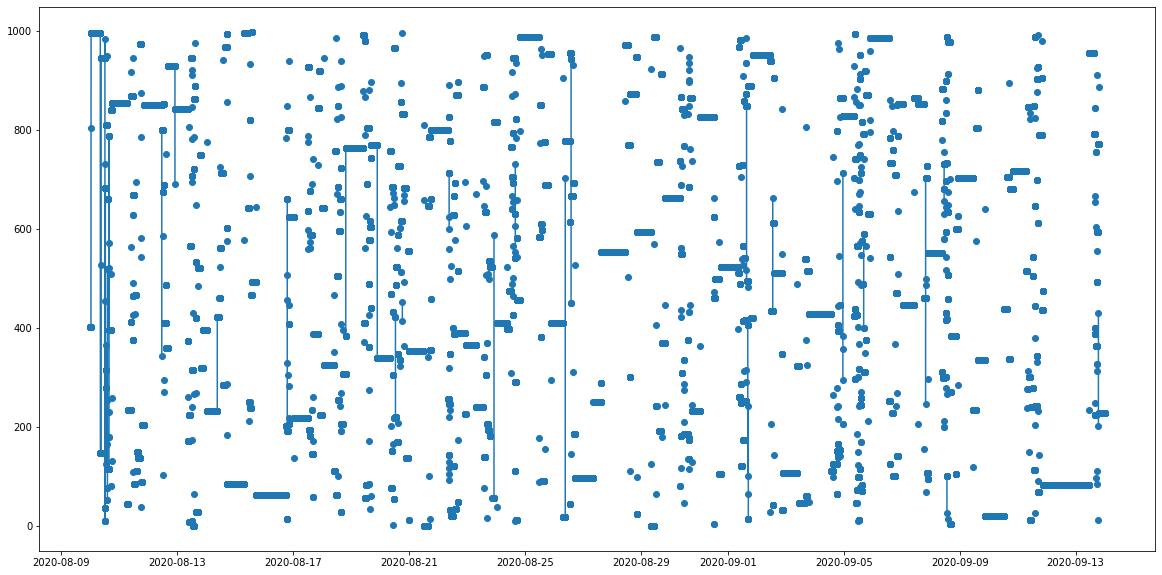

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df["Usage_CC"], "-o")

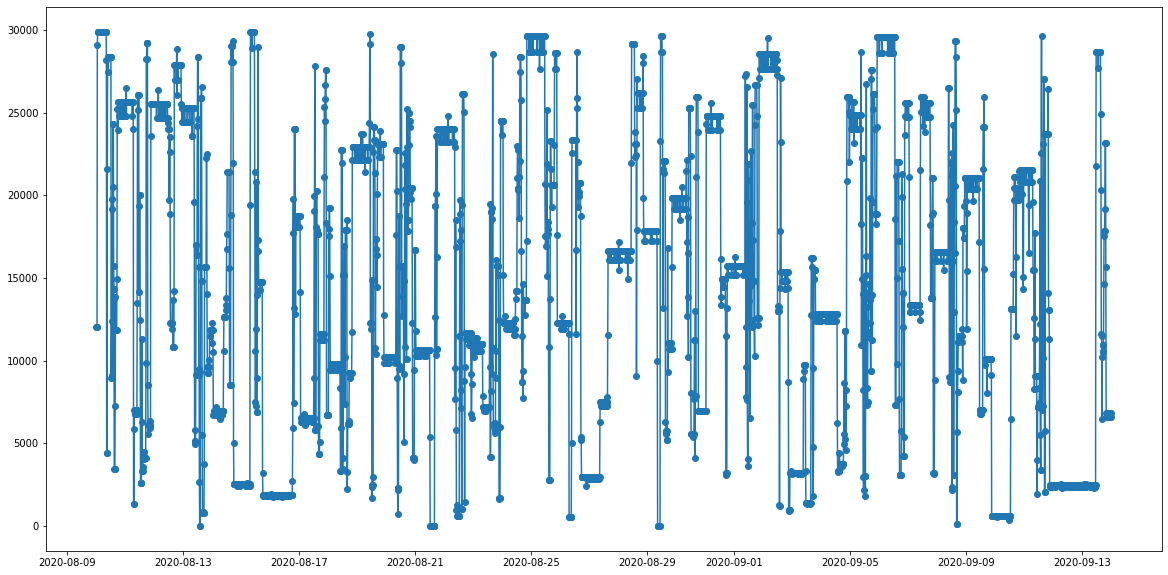

In [7]:
df_sum = df.resample('15min').sum()
plt.figure(figsize=(20,10))
plt.plot(df_sum.index, df_sum["Usage_CC"], "-o")

(18506.0, 18507.0)

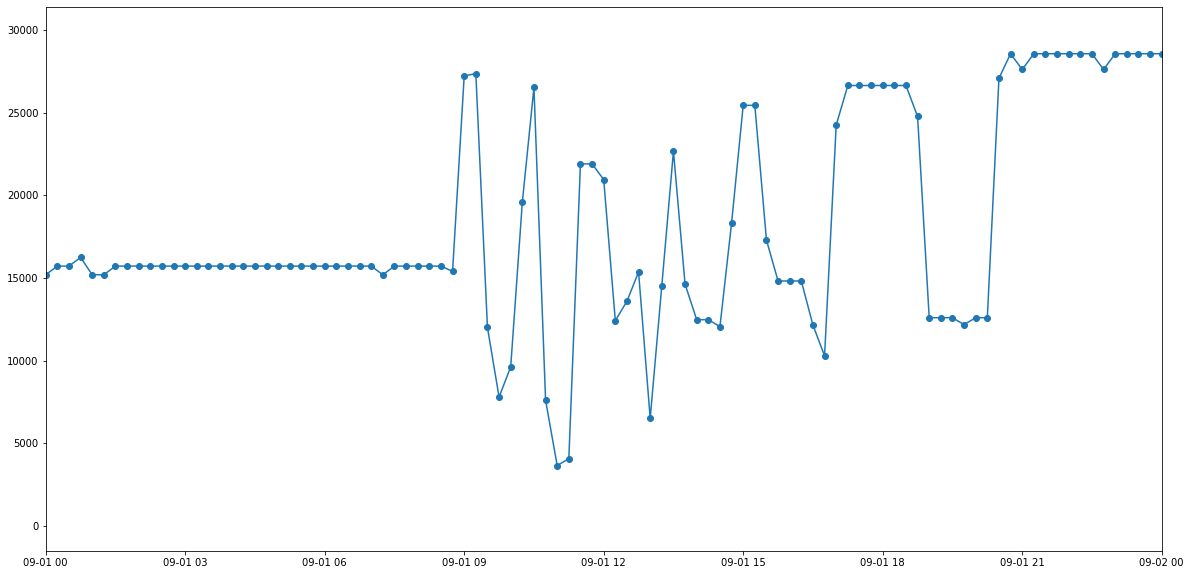

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df_sum.index, df_sum["Usage_CC"], "-o")
plt.gca().set_xlim([datetime.datetime.strptime("2020-09-01 00:00:00", "%Y-%m-%d %H:%M:%S"),
                    datetime.datetime.strptime("2020-09-02 00:00:00", "%Y-%m-%d %H:%M:%S")])

In [11]:
description = df_sum.describe().transpose()
display(description)

,count,mean,std,min,25%,50%,75%,max
ColdTemp,3360.0,1.146771e+03,7.038090e+02,8.400000e+01,8.850000e+02,1.020000e+03,1.160000e+03,5.953000e+03
ColdTemp_Insulation,3360.0,1.144756e+03,9.108587e+01,1.200000e+02,1.120000e+03,1.160000e+03,1.180000e+03,1.220000e+03
ColdTemp_Insulation_High,3360.0,1.201994e+03,9.564016e+01,1.260000e+02,1.176000e+03,1.218000e+03,1.239000e+03,1.281000e+03
ColdTemp_Insulation_Low,3360.0,8.585670e+02,6.831440e+01,9.000000e+01,8.400000e+02,8.700000e+02,8.850000e+02,9.150000e+02
Cold_Valve,3360.0,1.011905e-01,5.383742e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
Consumption,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cooling,3360.0,1.869048e+00,7.225793e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01
Current,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ErrorCode,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Filter_Hint,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [156]:
train_mean = df_sum["Usage_CC"].mean()
train_std = df_sum["Usage_CC"].std()

df_sum["Usage_CC"] = (df_sum["Usage_CC"] - train_mean) / train_std
print(df_sum[:5])

                     Usage_CC  weekend
UploadTime                            
2020-08-10 00:00:00 -0.300673        0
2020-08-10 00:15:00 -0.300673        0
2020-08-10 00:30:00 -0.300673        0
2020-08-10 00:45:00  1.578258        0
2020-08-10 01:00:00  1.664957        0


<ipython-input-156-6190b6682686>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
df_cols.isna().sum()

Usage_CC    0
weekend     0
dtype: int64

In [159]:
# split data into train, val, and test
n = len(dataset)
train_df = dataset[0:int(n*0.7)]
val_df = dataset[int(n*0.7):int(n*0.9)]
test_df = dataset[int(n*0.9):]

In [160]:
def split_window(sequence, steps):
    x_input, y_label = list(), list()
    for i in range(len(sequence)):
        window_end = i + steps
        if window_end == len(sequence):
            break
        x_input.append(sequence[i:window_end])
        y_label.append(sequence[window_end])
    return np.array(x_input), np.array(y_label)

In [161]:
# split to 6-hr windows, 5 inputs and 1 label
n_steps = 5
x_train, y_train = split_window(train_df, n_steps)
x_val, y_val = split_window(val_df, n_steps)
x_test, y_test = split_window(test_df, n_steps)
print(x_train.shape, y_train.shape)
n_features = x_train.shape[2]
for i in range(2):
    print(x_train[i])
    print(y_train[i])

(2347, 5, 2) (2347, 2)
[[-0.30067262  0.        ]
 [-0.30067262  0.        ]
 [-0.30067262  0.        ]
 [ 1.57825782  0.        ]
 [ 1.66495732  0.        ]]
[1.66495732 0.        ]
[[-0.30067262  0.        ]
 [-0.30067262  0.        ]
 [ 1.57825782  0.        ]
 [ 1.66495732  0.        ]
 [ 1.66495732  0.        ]]
[1.66495732 0.        ]


In [162]:
# vanilla lstm: only one hidden layer of lstm + one output layer
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mse',
             metrics=[tf.metrics.MeanAbsoluteError()]) 

In [163]:
# fit model
model.fit(x_train, y_train, epochs=200, verbose=0, 
          validation_data=(x_val, y_val))

In [164]:
# evaluate model using test data
results = model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 802us/step - loss: 0.7609 - mean_absolute_error: 0.7624


In [165]:
# generate predictions
predictions = model.predict(x_test, verbose=0)
print(predictions[:5])

[[ 0.04091225]
 [-0.09299648]
 [-0.09735613]
 [-0.10164826]
 [-0.09600542]]


In [167]:
# since shapes don't match for graphing make copies with only usage
y_train_usage = np.split(y_train, 2, axis=1)[0]
y_val_usage = np.split(y_val, 2, axis=1)[0]
y_test_usage = np.split(y_test, 2, axis=1)[0]

(18516.0, 18518.0)

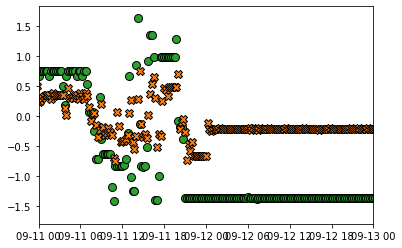

In [168]:
# blue line
plt.plot(df_cols.index[n_steps:int(n*0.7)], y_train,
        label='Inputs', marker='.', zorder=-10)
# purple line
plt.plot(df_cols.index[int(n*0.7)+n_steps:int(n*0.9)], y_val,
        label='Val', marker='.', zorder=-10)
# green dots
plt.scatter(df_cols.index[int(n*0.9)+n_steps:], y_test,
            edgecolors='k', label='Labels', c='#2ca02c', s=64)
# orange x's
plt.scatter(df_cols.index[int(n*0.9)+n_steps:], predictions,
            marker='X', edgecolors='k', label='Predictions',
            c='#ff7f0e', s=64)
plt.gca().set_xlim([datetime.datetime.strptime("2020-09-11 00:00:00", "%Y-%m-%d %H:%M:%S"), 
               datetime.datetime.strptime("2020-09-13 00:00:00", "%Y-%m-%d %H:%M:%S")])